In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [407]:
import warnings
warnings.filterwarnings('ignore')

In [408]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [409]:
df=pd.read_csv(r'C:\Users\hp\Downloads\final project\WeatherForecast\cleaned whether ds')

In [410]:
df

,Unnamed: 0,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,0,hyderabad,01-01-2024,28.0,15.1,21.7,27.6,15.1,21.6,14.0,65.0,0.0,0.0,0.0,no rain,0,0,25.6,13.0,112.2,1017.4,24.0,3.7,222.6,19.3,8,10.0,01-01-2024 06:46,01-01-2024 17:52,0.67,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
1,1,hyderabad,02-01-2024,26.9,15.0,21.1,27.3,15.0,21.1,15.3,71.6,0.0,0.0,0.0,no rain,0,0,27.7,16.6,101.1,1016.5,39.5,3.0,223.7,19.2,8,10.0,02-01-2024 06:46,02-01-2024 17:53,0.70,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
2,2,hyderabad,03-01-2024,27.0,17.0,21.8,27.1,17.0,21.8,15.0,67.4,0.0,0.0,0.0,no rain,0,0,34.6,19.4,114.7,1015.9,36.9,3.1,222.4,19.2,8,10.0,03-01-2024 06:46,03-01-2024 17:53,0.73,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
3,3,hyderabad,04-01-2024,27.9,17.0,22.0,27.6,17.0,22.0,15.5,69.0,0.0,0.0,0.0,no rain,0,0,31.3,16.6,110.8,1015.9,32.3,3.0,226.5,19.6,8,10.0,04-01-2024 06:47,04-01-2024 17:54,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
4,4,hyderabad,05-01-2024,28.0,17.0,22.0,27.4,17.0,21.9,13.3,61.2,0.0,0.0,0.0,no rain,0,0,32.0,14.8,120.5,1016.0,25.5,4.0,227.4,19.5,8,10.0,05-01-2024 06:47,05-01-2024 17:55,0.80,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,hyderabad,27-12-2021,27.5,17.1,21.9,27.9,17.1,22.0,17.8,79.2,0.0,0.0,0.0,no rain,0,0,31.7,10.1,121.1,1018.2,11.7,3.9,179.5,15.4,7,0.0,27-12-2021 06:44,27-12-2021 17:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
1334,1334,hyderabad,28-12-2021,27.4,17.0,22.1,27.7,17.0,22.2,16.3,71.7,0.0,0.0,0.0,no rain,0,0,32.0,13.0,139.6,1017.1,6.4,5.0,211.9,18.2,8,0.0,28-12-2021 06:44,28-12-2021 17:50,0.81,Clear,Clear conditions throughout the day.,clear-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
1335,1335,hyderabad,29-12-2021,27.1,17.0,21.7,27.5,17.0,21.7,16.5,74.2,0.0,0.0,0.0,no rain,0,0,30.6,13.0,139.2,1016.7,19.2,5.0,198.5,17.1,8,0.0,29-12-2021 06:45,29-12-2021 17:51,0.85,Clear,Clear conditions throughout the day.,clear-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
1336,1336,hyderabad,30-12-2021,25.9,17.0,20.9,25.9,17.0,20.9,16.4,77.2,0.0,0.0,0.0,no rain,0,0,32.0,16.6,105.5,1018.9,36.1,4.8,153.6,13.3,6,0.0,30-12-2021 06:45,30-12-2021 17:51,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"


In [411]:
pd.set_option('display.max_columns',None)

In [412]:
df['conditions'].unique()

array(['Partially cloudy', 'Rain, Partially cloudy', 'Clear',
       'Rain, Overcast', 'Overcast'], dtype=object)

In [413]:
df['icon'].unique()

array(['partly-cloudy-day', 'rain', 'clear-day', 'wind', 'cloudy'],
      dtype=object)

In [414]:
df['description'].unique()

array(['Partly cloudy throughout the day.', 'Clearing in the afternoon.',
       'Partly cloudy throughout the day with early morning rain.',
       'Clear conditions throughout the day.',
       'Becoming cloudy in the afternoon.',
       'Partly cloudy throughout the day with rain clearing later.',
       'Partly cloudy throughout the day with rain.',
       'Partly cloudy throughout the day with late afternoon rain.',
       'Partly cloudy throughout the day with morning rain.',
       'Partly cloudy throughout the day with afternoon rain.',
       'Partly cloudy throughout the day with a chance of rain throughout the day.',
       'Partly cloudy throughout the day with rain in the morning and afternoon.',
       'Cloudy skies throughout the day with late afternoon rain.',
       'Cloudy skies throughout the day with early morning rain.',
       'Cloudy skies throughout the day with afternoon rain.',
       'Cloudy skies throughout the day with rain.',
       'Cloudy skies throughou

In [415]:
df.columns

Index(['Unnamed: 0', 'name', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')

In [416]:
X=df.drop(columns=['tempmax', 'tempmin', 'temp','humidity', 'preciptype', 'windspeed','cloudcover','conditions','description', 'icon'],axis=1)

In [417]:
X=df.drop(columns=['tempmax', 'tempmin', 'temp','humidity', 'preciptype', 'windspeed','cloudcover','conditions','description', 'icon',],axis=1)
y=df[['tempmax', 'tempmin', 'temp','humidity', 'preciptype', 'windspeed','cloudcover','conditions','description', 'icon']]

In [418]:
le=LabelEncoder()
X['name']=le.fit_transform(X['name'])

In [419]:

uniq_stations = X['stations'].unique()
d = {station: index for index, station in enumerate(uniq_stations)}
print(d)
X['stations'] = X['stations'].map(d)

{'VOHY,43083099999,43128599999,VOHS,43128099999': 0, 'VOHY,43083099999,43128599999,43128099999,VOHS': 1, 'VOHY,43083099999,43128599999,VOHS,43128099999,remote': 2, 'VOHY,43128599999,VOHS,43128099999': 3, 'VOHY,43128599999,VOHS,43128099999,remote': 4, 'VOHY,43083099999,43128599999,VOHS,remote,43128099999': 5, 'VOHY,VOHS': 6, 'VOHY,VOHS,remote': 7, 'VOHY,VOHS,remote,43128099999': 8, '43083099999,43128599999,VOHS,43128099999': 9, 'VOHY,43083099999,43128599999,remote,43128099999,VOHS': 10, 'VOHY,43128599999,VOHS': 11, 'VOHY,remote,VOHS': 12, '43083099999,remote,43128099999': 13, 'VOHY,43083099999,remote,43128099999': 14, '43083099999,43128599999,remote,43128099999,VOHS': 15, '43128599999,VOHS,43128099999': 16, '43083099999,43128599999,VOHS,43128099999,remote': 17, 'VOHY,43128599999,remote,VOHS,43128099999': 18, 'VOHY,43128599999,43128099999,VOHS': 19, 'VOHY,43128599999,VOHS,remote,43128099999': 20, '43128599999,remote,43128099999,VOHS': 21, 'VOHY,43128599999,remote,43128099999,VOHS': 22, '

In [420]:
uniq_s = y[['preciptype','conditions','description','icon']]
for i in uniq_s:
    u=y[i].unique()
    print(u)

['no rain' 'rain']
['Partially cloudy' 'Rain, Partially cloudy' 'Clear' 'Rain, Overcast'
 'Overcast']
['Partly cloudy throughout the day.' 'Clearing in the afternoon.'
 'Partly cloudy throughout the day with early morning rain.'
 'Clear conditions throughout the day.'
 'Becoming cloudy in the afternoon.'
 'Partly cloudy throughout the day with rain clearing later.'
 'Partly cloudy throughout the day with rain.'
 'Partly cloudy throughout the day with late afternoon rain.'
 'Partly cloudy throughout the day with morning rain.'
 'Partly cloudy throughout the day with afternoon rain.'
 'Partly cloudy throughout the day with a chance of rain throughout the day.'
 'Partly cloudy throughout the day with rain in the morning and afternoon.'
 'Cloudy skies throughout the day with late afternoon rain.'
 'Cloudy skies throughout the day with early morning rain.'
 'Cloudy skies throughout the day with afternoon rain.'
 'Cloudy skies throughout the day with rain.'
 'Cloudy skies throughout the day 

In [421]:

for i in ['preciptype','conditions','description','icon']:
    uniq_s=y[i].unique()
    value_to_index={col : index for index,col in enumerate(uniq_s)}
    print(f'{i}:{value_to_index}')
    y[i] = y[i].map(value_to_index)

preciptype:{'no rain': 0, 'rain': 1}
conditions:{'Partially cloudy': 0, 'Rain, Partially cloudy': 1, 'Clear': 2, 'Rain, Overcast': 3, 'Overcast': 4}
description:{'Partly cloudy throughout the day.': 0, 'Clearing in the afternoon.': 1, 'Partly cloudy throughout the day with early morning rain.': 2, 'Clear conditions throughout the day.': 3, 'Becoming cloudy in the afternoon.': 4, 'Partly cloudy throughout the day with rain clearing later.': 5, 'Partly cloudy throughout the day with rain.': 6, 'Partly cloudy throughout the day with late afternoon rain.': 7, 'Partly cloudy throughout the day with morning rain.': 8, 'Partly cloudy throughout the day with afternoon rain.': 9, 'Partly cloudy throughout the day with a chance of rain throughout the day.': 10, 'Partly cloudy throughout the day with rain in the morning and afternoon.': 11, 'Cloudy skies throughout the day with late afternoon rain.': 12, 'Cloudy skies throughout the day with early morning rain.': 13, 'Cloudy skies throughout the 

In [422]:
y

,tempmax,tempmin,temp,humidity,preciptype,windspeed,cloudcover,conditions,description,icon
0,28.0,15.1,21.7,65.0,0,13.0,24.0,0,0,0
1,26.9,15.0,21.1,71.6,0,16.6,39.5,0,0,0
2,27.0,17.0,21.8,67.4,0,19.4,36.9,0,0,0
3,27.9,17.0,22.0,69.0,0,16.6,32.3,0,0,0
4,28.0,17.0,22.0,61.2,0,14.8,25.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,27.5,17.1,21.9,79.2,0,10.1,11.7,2,3,2
1334,27.4,17.0,22.1,71.7,0,13.0,6.4,2,3,2
1335,27.1,17.0,21.7,74.2,0,13.0,19.2,2,3,2
1336,25.9,17.0,20.9,77.2,0,16.6,36.1,0,0,0


In [423]:
X

,Unnamed: 0,name,datetime,feelslikemax,feelslikemin,feelslike,dew,precip,precipprob,precipcover,snow,snowdepth,windgust,winddir,sealevelpressure,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,stations
0,0,0,01-01-2024,27.6,15.1,21.6,14.0,0.0,0.0,0.0,0,0,25.6,112.2,1017.4,3.7,222.6,19.3,8,10.0,01-01-2024 06:46,01-01-2024 17:52,0.67,0
1,1,0,02-01-2024,27.3,15.0,21.1,15.3,0.0,0.0,0.0,0,0,27.7,101.1,1016.5,3.0,223.7,19.2,8,10.0,02-01-2024 06:46,02-01-2024 17:53,0.70,0
2,2,0,03-01-2024,27.1,17.0,21.8,15.0,0.0,0.0,0.0,0,0,34.6,114.7,1015.9,3.1,222.4,19.2,8,10.0,03-01-2024 06:46,03-01-2024 17:53,0.73,0
3,3,0,04-01-2024,27.6,17.0,22.0,15.5,0.0,0.0,0.0,0,0,31.3,110.8,1015.9,3.0,226.5,19.6,8,10.0,04-01-2024 06:47,04-01-2024 17:54,0.75,0
4,4,0,05-01-2024,27.4,17.0,21.9,13.3,0.0,0.0,0.0,0,0,32.0,120.5,1016.0,4.0,227.4,19.5,8,10.0,05-01-2024 06:47,05-01-2024 17:55,0.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,0,27-12-2021,27.9,17.1,22.0,17.8,0.0,0.0,0.0,0,0,31.7,121.1,1018.2,3.9,179.5,15.4,7,0.0,27-12-2021 06:44,27-12-2021 17:50,0.75,0
1334,1334,0,28-12-2021,27.7,17.0,22.2,16.3,0.0,0.0,0.0,0,0,32.0,139.6,1017.1,5.0,211.9,18.2,8,0.0,28-12-2021 06:44,28-12-2021 17:50,0.81,0
1335,1335,0,29-12-2021,27.5,17.0,21.7,16.5,0.0,0.0,0.0,0,0,30.6,139.2,1016.7,5.0,198.5,17.1,8,0.0,29-12-2021 06:45,29-12-2021 17:51,0.85,0
1336,1336,0,30-12-2021,25.9,17.0,20.9,16.4,0.0,0.0,0.0,0,0,32.0,105.5,1018.9,4.8,153.6,13.3,6,0.0,30-12-2021 06:45,30-12-2021 17:51,0.88,0


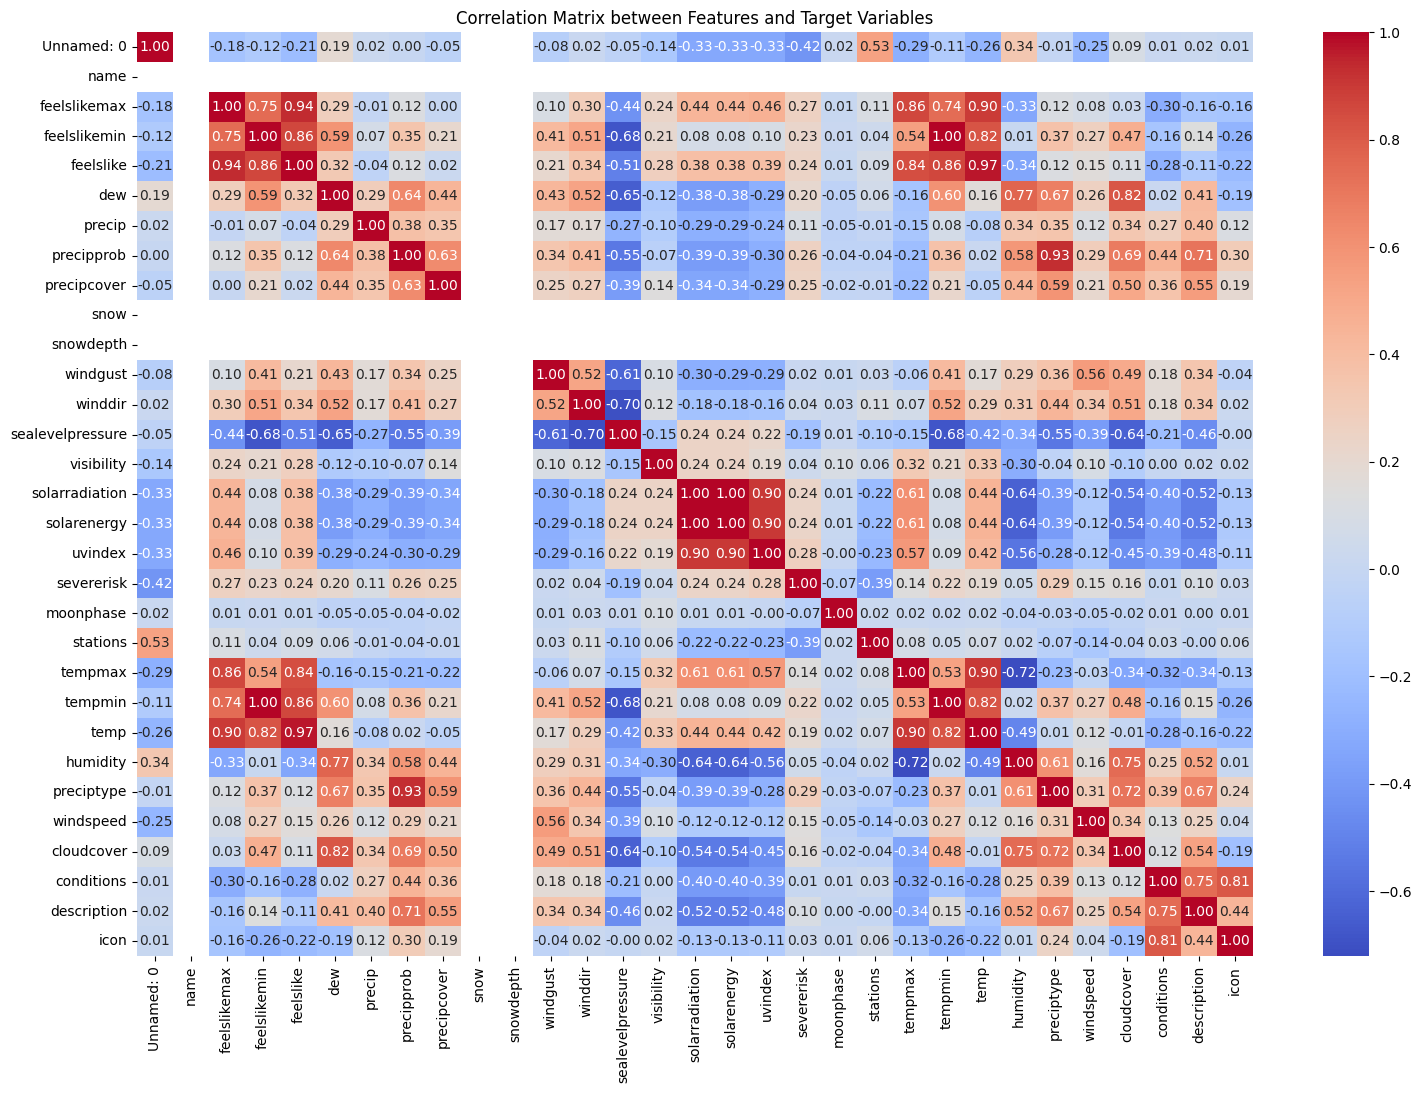

In [424]:

Xx = X.drop(columns=['datetime'], errors='ignore')
Xx = X.select_dtypes(include=['number'])

combined_df = pd.concat([Xx, y], axis=1)
corr_matrix = combined_df.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Features and Target Variables')
plt.show()


In [425]:
X=X.drop(columns= ['visibility','severerisk','moonphase','stations','snow','snowdepth','Unnamed: 0','name'], axis=1)

In [426]:
X['Sunrise']=X['sunrise'].str.split().str[:10].str[1]

In [427]:
X['Sunset']=X['sunset'].str.split().str[:10].str[1]

In [428]:
X=X.drop(columns=['sunrise','sunset'],axis=1)

In [429]:
X

,datetime,feelslikemax,feelslikemin,feelslike,dew,precip,precipprob,precipcover,windgust,winddir,sealevelpressure,solarradiation,solarenergy,uvindex,Sunrise,Sunset
0,01-01-2024,27.6,15.1,21.6,14.0,0.0,0.0,0.0,25.6,112.2,1017.4,222.6,19.3,8,06:46,17:52
1,02-01-2024,27.3,15.0,21.1,15.3,0.0,0.0,0.0,27.7,101.1,1016.5,223.7,19.2,8,06:46,17:53
2,03-01-2024,27.1,17.0,21.8,15.0,0.0,0.0,0.0,34.6,114.7,1015.9,222.4,19.2,8,06:46,17:53
3,04-01-2024,27.6,17.0,22.0,15.5,0.0,0.0,0.0,31.3,110.8,1015.9,226.5,19.6,8,06:47,17:54
4,05-01-2024,27.4,17.0,21.9,13.3,0.0,0.0,0.0,32.0,120.5,1016.0,227.4,19.5,8,06:47,17:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,27-12-2021,27.9,17.1,22.0,17.8,0.0,0.0,0.0,31.7,121.1,1018.2,179.5,15.4,7,06:44,17:50
1334,28-12-2021,27.7,17.0,22.2,16.3,0.0,0.0,0.0,32.0,139.6,1017.1,211.9,18.2,8,06:44,17:50
1335,29-12-2021,27.5,17.0,21.7,16.5,0.0,0.0,0.0,30.6,139.2,1016.7,198.5,17.1,8,06:45,17:51
1336,30-12-2021,25.9,17.0,20.9,16.4,0.0,0.0,0.0,32.0,105.5,1018.9,153.6,13.3,6,06:45,17:51


In [457]:
df['datetime']=pd.to_datetime(df['datetime'],format='%d-%m-%y', errors='coerce')

In [458]:
df['datetime']=pd.to_datetime(df['datetime'],format='%d-%m-%y')

In [459]:
df

,Unnamed: 0,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,0,hyderabad,NaT,28.0,15.1,21.7,27.6,15.1,21.6,14.0,65.0,0.0,0.0,0.0,no rain,0,0,25.6,13.0,112.2,1017.4,24.0,3.7,222.6,19.3,8,10.0,01-01-2024 06:46,01-01-2024 17:52,0.67,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
1,1,hyderabad,NaT,26.9,15.0,21.1,27.3,15.0,21.1,15.3,71.6,0.0,0.0,0.0,no rain,0,0,27.7,16.6,101.1,1016.5,39.5,3.0,223.7,19.2,8,10.0,02-01-2024 06:46,02-01-2024 17:53,0.70,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
2,2,hyderabad,NaT,27.0,17.0,21.8,27.1,17.0,21.8,15.0,67.4,0.0,0.0,0.0,no rain,0,0,34.6,19.4,114.7,1015.9,36.9,3.1,222.4,19.2,8,10.0,03-01-2024 06:46,03-01-2024 17:53,0.73,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
3,3,hyderabad,NaT,27.9,17.0,22.0,27.6,17.0,22.0,15.5,69.0,0.0,0.0,0.0,no rain,0,0,31.3,16.6,110.8,1015.9,32.3,3.0,226.5,19.6,8,10.0,04-01-2024 06:47,04-01-2024 17:54,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
4,4,hyderabad,NaT,28.0,17.0,22.0,27.4,17.0,21.9,13.3,61.2,0.0,0.0,0.0,no rain,0,0,32.0,14.8,120.5,1016.0,25.5,4.0,227.4,19.5,8,10.0,05-01-2024 06:47,05-01-2024 17:55,0.80,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,hyderabad,NaT,27.5,17.1,21.9,27.9,17.1,22.0,17.8,79.2,0.0,0.0,0.0,no rain,0,0,31.7,10.1,121.1,1018.2,11.7,3.9,179.5,15.4,7,0.0,27-12-2021 06:44,27-12-2021 17:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
1334,1334,hyderabad,NaT,27.4,17.0,22.1,27.7,17.0,22.2,16.3,71.7,0.0,0.0,0.0,no rain,0,0,32.0,13.0,139.6,1017.1,6.4,5.0,211.9,18.2,8,0.0,28-12-2021 06:44,28-12-2021 17:50,0.81,Clear,Clear conditions throughout the day.,clear-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
1335,1335,hyderabad,NaT,27.1,17.0,21.7,27.5,17.0,21.7,16.5,74.2,0.0,0.0,0.0,no rain,0,0,30.6,13.0,139.2,1016.7,19.2,5.0,198.5,17.1,8,0.0,29-12-2021 06:45,29-12-2021 17:51,0.85,Clear,Clear conditions throughout the day.,clear-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
1336,1336,hyderabad,NaT,25.9,17.0,20.9,25.9,17.0,20.9,16.4,77.2,0.0,0.0,0.0,no rain,0,0,32.0,16.6,105.5,1018.9,36.1,4.8,153.6,13.3,6,0.0,30-12-2021 06:45,30-12-2021 17:51,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"


In [431]:
'''import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

# Splitting your target variables into continuous and categorical columns
continuous_vars = ['tempmax', 'tempmin', 'temp', 'humidity', 'windspeed']
categorical_vars = ['preciptype', 'cloudcover', 'conditions', 'description', 'icon']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predicting continuous variables using RandomForestRegressor
regressors = {}
for var in continuous_vars:
    rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_reg.fit(X_train, y_train[var])
    regressors[var] = rf_reg

# Predicting categorical variables using RandomForestClassifier
classifiers = {}
for var in categorical_vars:
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(X_train, y_train[var])
    classifiers[var] = rf_clf

# Making predictions for continuous variables
y_pred_continuous = pd.DataFrame()
for var, reg in regressors.items():
    y_pred_continuous[var] = reg.predict(X_test)

# Making predictions for categorical variables
y_pred_categorical = pd.DataFrame()
for var, clf in classifiers.items():
    y_pred_categorical[var] = clf.predict(X_test)

# Combining the predictions
y_pred = pd.concat([y_pred_continuous, y_pred_categorical], axis=1)

# Evaluation
for var in continuous_vars:
    print(f'{var} MSE:', mean_squared_error(y_test[var], y_pred[var]))

for var in categorical_vars:
    print(f'{var} Accuracy:', accuracy_score(y_test[var], y_pred[var]))

# The predictions are stored in y_pred DataFrame  '''


"import pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestRegressor, RandomForestClassifier\nfrom sklearn.metrics import mean_squared_error, accuracy_score\n\n# Splitting your target variables into continuous and categorical columns\ncontinuous_vars = ['tempmax', 'tempmin', 'temp', 'humidity', 'windspeed']\ncategorical_vars = ['preciptype', 'cloudcover', 'conditions', 'description', 'icon']\n\n# Splitting the data into train and test sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Predicting continuous variables using RandomForestRegressor\nregressors = {}\nfor var in continuous_vars:\n    rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)\n    rf_reg.fit(X_train, y_train[var])\n    regressors[var] = rf_reg\n\n# Predicting categorical variables using RandomForestClassifier\nclassifiers = {}\nfor var in categorical_vars:\n    rf_clf = RandomForestClassifier(n_es